In [135]:
import os

import numpy as np
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.cluster import KMeans

In [180]:
#Interquartile Range Method
def remove_outliers(arr):
    quartile_1, quartile_3 = np.percentile(arr, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    filtered_arr = [x for x in arr if lower_bound <= x <= upper_bound]
    return filtered_arr if filtered_arr else np.nan

In [181]:
#Setup Database
load_dotenv()
uri = os.environ['DB_URI']
client = MongoClient(uri)
db = client["rosen"]
collection = db["big_data_2"]

In [182]:
documents = collection.find({}, {"_id": 1, "instrument": 1, "configuration": 1, "velocity": 1})
average_velocities = pd.DataFrame(list(documents))

In [183]:
average_velocities['velocity'] = average_velocities['velocity'].apply(lambda x: np.mean(remove_outliers(x)))

In [185]:
average_velocities.tail()

,_id,instrument,configuration,velocity
1995,ff361f44-0763-4872-9770-ff1b4c2a7fea,Dog,Asia,3.397272
1996,ff7d9fe9-619e-4641-9f25-b474545a3c6f,Dolphin,Europe,0.739239
1997,ff854cd3-a426-43b9-a263-51faf0df6cbb,Unicorn,America,0.796705
1998,ff931395-97ad-46b1-8add-ee6b47f4056f,Dolphin,America,3.623103
1999,ff9746e0-c72d-499f-8012-c84edfb33b3e,Dog,Europe,3.694192


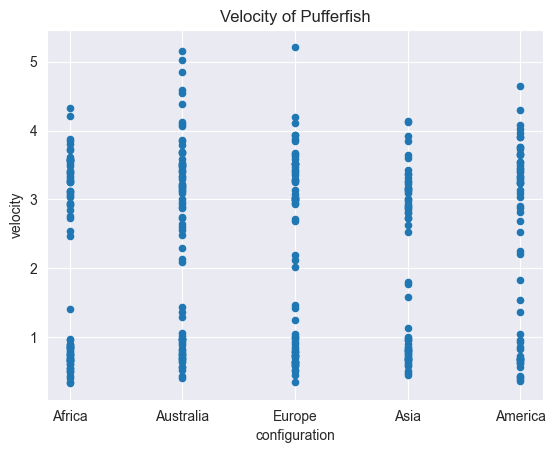

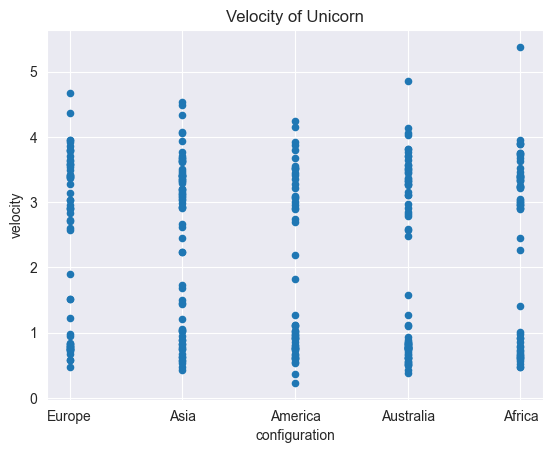

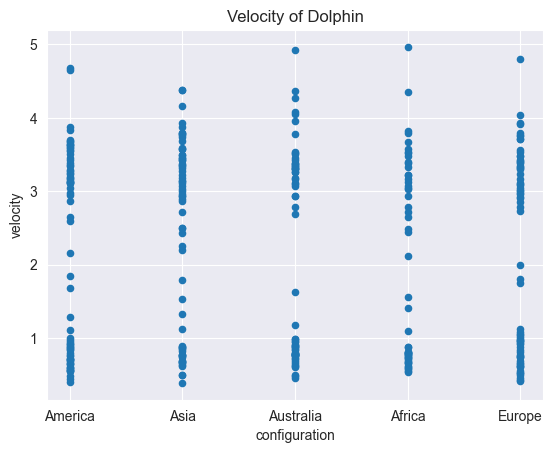

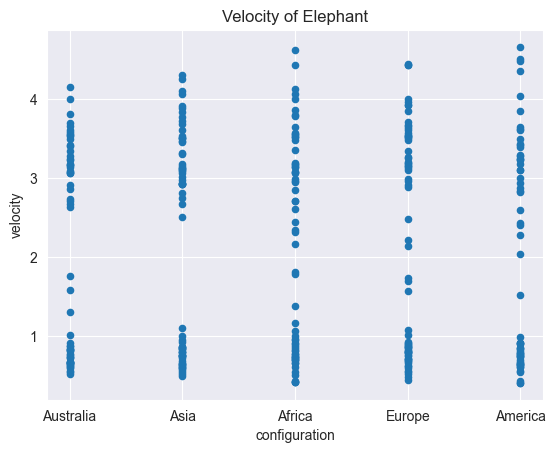

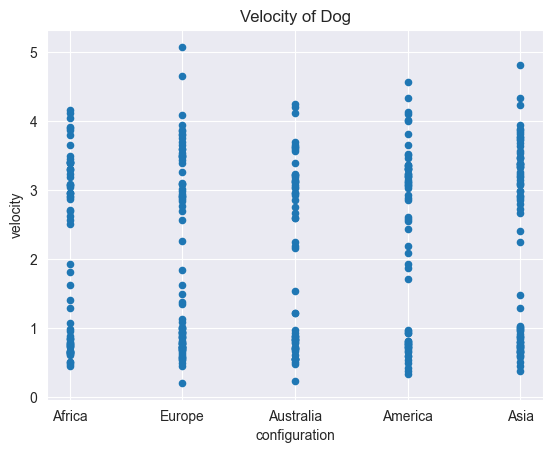

In [186]:
for val in average_velocities['instrument'].unique():
    sdf = average_velocities.loc[average_velocities['instrument']==val]
    sdf.plot(x='configuration', y='velocity', kind='scatter', title=f'Velocity of {val}')

man kann (teilweise) erkennen, dass es zwei geschwindigkeitsbereiche gibt -> gas und flüssigkeit (?)